In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cuml
import cudf
import array as arr
# import umap.umap_ as umap
import umap
import umap.plot
import pylab

# import pycuda.autoinit
# import pycuda.gpuarray as gpuarray
# from skcuda.cublas import *
from scipy import sparse
import sympy
from sklearn.preprocessing import LabelBinarizer
# from matplotlib.gridspec import GridSpec
from cuml.manifold.umap import UMAP as clUMAP
# from cuml.cluster import KMeans as cuKM
# from cuml.decomposition import PCA as cuPCA
# from sklearn.decomposition import PCA as skPCA
# from sklearn.cluster import KMeans as skKM
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
counts = pd.read_csv('/home/lima/Project/simulation/Comparision/all/normalized/NormalizedKallistoReadCounts.csv')
counts = counts.rename(columns = {"Unnamed: 0": "GeneID"})
with open("CGRAllKallisto.pkl", "rb") as pkl_in:
    cgrCounts = pickle.load(pkl_in)
pkl_in.close()
convertedSeq = pd.DataFrame.from_dict(cgrCounts, orient = 'index')
seqList = convertedSeq.iloc[ : , 0].tolist()
idx = [i for i in range(len(seqList[0]))]
convertedSeq[idx] = pd.DataFrame(seqList, index = convertedSeq.index)
convertedSeq.reset_index(inplace = True)
convertedSeq.rename(columns = {"index": "GeneID"}, inplace = True)

samples = list(counts.columns.values)
samples = samples[1 : ]
geneIDs = list(convertedSeq['GeneID'])
cgrMatrix = convertedSeq.drop(columns = 'GeneID').to_numpy()
result = []

for sample in samples:
    # print(sample)
    sampleCounts = counts[sample].to_numpy()
    # print(sampleCounts.shape)
    sampleCounts = sampleCounts.reshape(len(sampleCounts), 1)
    
    tmp = cgrMatrix * sampleCounts
    colIdx = [i for i in range(tmp.shape[1])]
    labels = [sample] * len(tmp)
    # col = colIdx + lables
    
    df = pd.DataFrame(tmp, index = geneIDs)
    df['Label'] = labels
    result.append(df)

result = pd.concat(result)

In [3]:
rlt = result.drop(columns = 'Label')
rlt.reset_index(drop = True, inplace = True)
target = np.array(result.Label, dtype = np.str)
targetDF = pd.DataFrame(target)
encoder = LabelEncoder()
encodedLabels = encoder.fit_transform(target)
encodedLabelsDF = pd.Series(encodedLabels)
# arrEncodedLabels = arr.array('h', encodedLabels)
classesTotal = samples

In [4]:
nd_rlt = rlt.to_numpy()
spars_rlt = sparse.csr_matrix(nd_rlt, dtype = np.float)
# target = encodedLabels.reshape(len(encodedLabels), 1).astype(float)
# spars_target = csr_matrix(target)
# mtx = sparse.lil_matrix(nd_rlt)

In [7]:
%%time
embedding = umap.UMAP().fit_transform(spars_rlt)

TypeError: a bytes-like object is required, not 'list'

In [4]:
gdf = cudf.from_pandas(rlt)
gdf_target = cudf.from_pandas(encodedLabelsDF)

In [5]:
%%time
embedding_supervised1 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 50, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 5.47 s, sys: 1.48 s, total: 6.96 s
Wall time: 6.93 s


In [6]:
%%time
embedding_supervised2 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 100, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 5.06 s, sys: 1.33 s, total: 6.39 s
Wall time: 6.36 s


In [7]:
%%time
embedding_supervised3 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 150, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.75 s, sys: 1.18 s, total: 5.93 s
Wall time: 5.9 s


In [8]:
%%time
embedding_supervised4 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 200, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 5.03 s, sys: 1.33 s, total: 6.36 s
Wall time: 6.34 s


In [9]:
%%time
embedding_supervised5 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 250, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 5.03 s, sys: 1.33 s, total: 6.37 s
Wall time: 6.34 s


In [10]:
%%time
embedding_supervised6 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 300, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 5.03 s, sys: 1.31 s, total: 6.34 s
Wall time: 6.32 s


In [11]:
%%time
embedding_supervised7 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 350, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.81 s, sys: 1.14 s, total: 5.96 s
Wall time: 5.93 s


In [12]:
%%time
embedding_supervised8 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 400, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.81 s, sys: 1.16 s, total: 5.97 s
Wall time: 5.94 s


In [13]:
%%time
embedding_supervised9 = clUMAP(verbose = False, n_neighbors = 15, min_dist = 0.0, spread = 450, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 5 s, sys: 1.25 s, total: 6.25 s
Wall time: 6.23 s


In [14]:
embeddings = [embedding_supervised1, embedding_supervised2, embedding_supervised3, embedding_supervised4, 
              embedding_supervised5, embedding_supervised6, embedding_supervised7, embedding_supervised8, 
             embedding_supervised9]

In [18]:
embeddings_numpy = []
spread_init = 50
for embed in embeddings:
    tmp = embed.to_pandas().values
    # sprint(type(tmp))
    embeddings_numpy.append({(15, 0, spread_init): tmp})
    spread_init += 50

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
list(embeddings_numpy[0].values())

[array([[ 12.569459 , -30.60394  ],
        [-19.69855  ,  41.483727 ],
        [  9.818276 , -49.727665 ],
        ...,
        [-71.64232  ,   9.76341  ],
        [-36.53338  ,  48.70783  ],
        [ 18.6445   ,   5.1675606]], dtype=float32)]

(3, 3)
x: 0, y: 0
x: 0, y: 1
x: 0, y: 2
x: 1, y: 0
x: 1, y: 1
x: 1, y: 2
x: 2, y: 0
x: 2, y: 1
x: 2, y: 2


[]

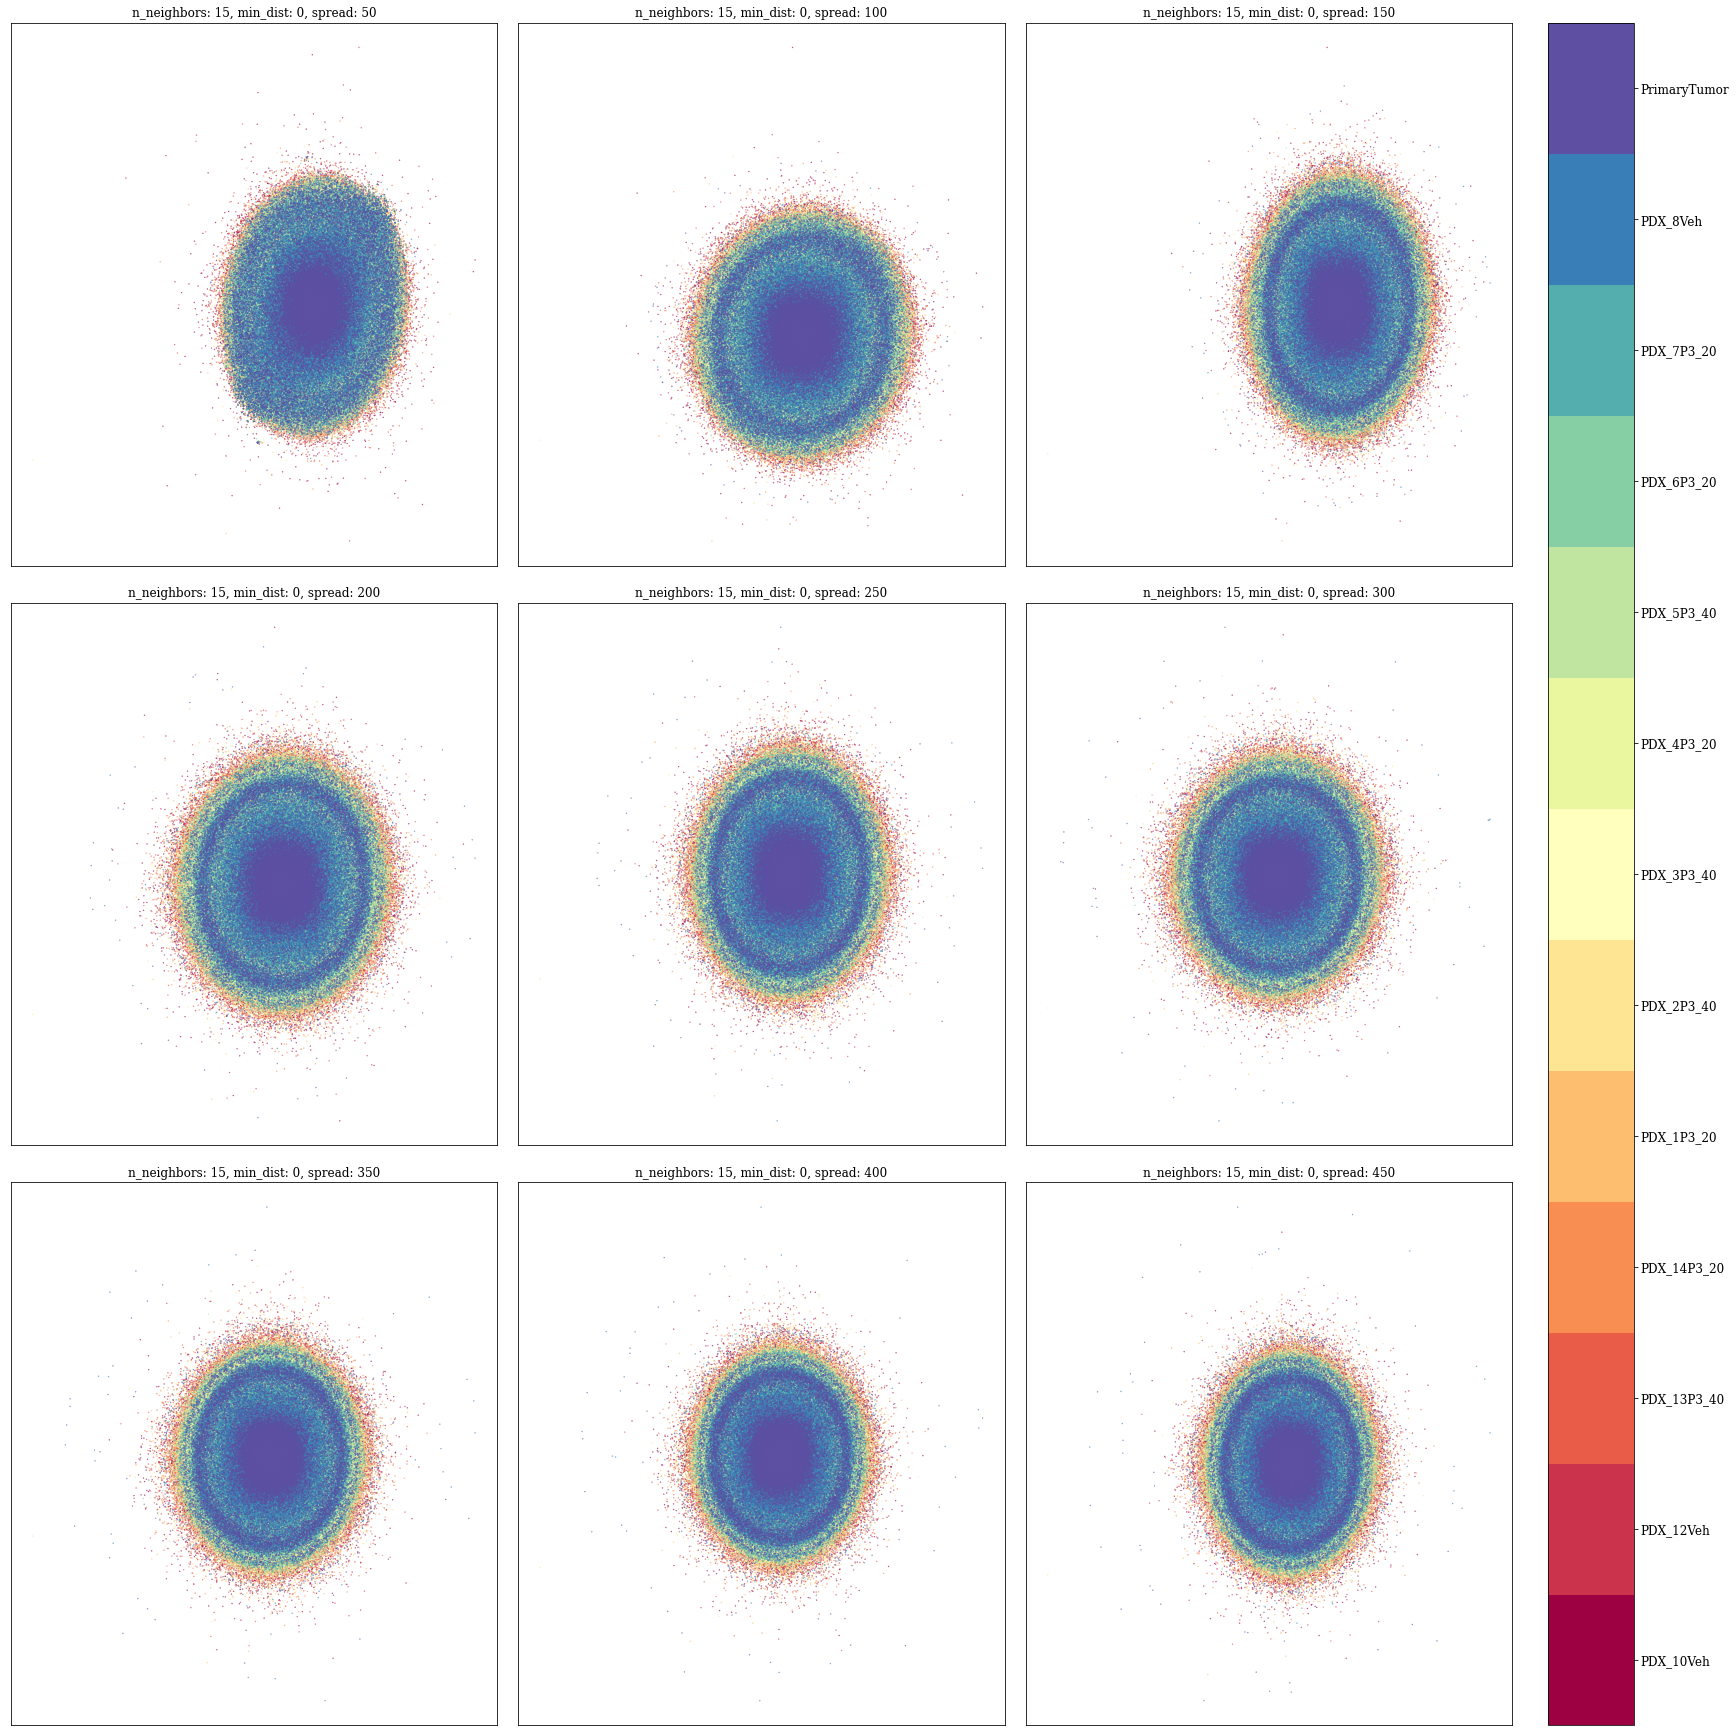

In [59]:
params = {'legend.fontsize': 12, 
                    'font.family': 'serif',
                    'font.weight': 'medium',
                    'font.variant': 'normal',
                    #'figure.figsize': (10, 10), 
                    'figure.edgecolor': '#04253a', 
                    'figure.titlesize': 12, 
                    'axes.labelsize': 6, 
                    'axes.titlesize': 12, 
                    'xtick.labelsize': 6, 
                    'ytick.labelsize': 6}
pylab.rcParams.update(params)
fig, axes = plt.subplots(3, 3, figsize = (24, 24), constrained_layout = True)
print(axes.shape)
width = axes.shape[0]
height = axes.shape[1]
matrix_len = len(embeddings_numpy)
for index in range(matrix_len):
    tmp = embeddings_numpy[index]
    tlt = list(tmp.keys())
    title = tlt[0]
    tmp_embed = list(tmp.values())
    embed = tmp_embed[0]
    x_corrd = int(index / width)
    y_corrd = int(index % height)
    print("x: {x}, y: {y}".format(x = x_corrd, y = y_corrd))
    ax = axes[x_corrd, y_corrd]
    im = ax.scatter(embed[ : , 1], embed[ : , 0], s = 0.1, c = encodedLabels, cmap = 'Spectral', alpha=1.0)
    ax.set_xticks([])
    ax.set_yticks([])
    title_str = "n_neighbors: {n_neighbors}, min_dist: {min_dist}, spread: {spread}".format(n_neighbors = title[0], 
                                                                                           min_dist = title[1], 
                                                                                           spread = title[2])
    ax.set_title(title_str)
# fig.subplots_adjust(right = 0.8)
# cbar = fig.colorbar(im, ax = axes[ : , :], boundaries = np.arange(14) - 0.5)
cbar = plt.colorbar(im, ax = axes, boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
cbar.ax.tick_params(labelsize = 12)
plt.plot()

In [6]:
%%time
embedding_supervised1 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 50, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 4.75 s, sys: 1.46 s, total: 6.21 s
Wall time: 6.18 s


In [7]:
%%time
embedding_supervised2 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 100, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.61 s, sys: 1.38 s, total: 5.99 s
Wall time: 5.97 s


In [8]:
%%time
embedding_supervised3 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 150, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.28 s, sys: 1.07 s, total: 5.35 s
Wall time: 5.33 s


In [9]:
%%time
embedding_supervised4 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 200, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.61 s, sys: 1.21 s, total: 5.82 s
Wall time: 5.79 s


In [10]:
%%time
embedding_supervised5 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 250, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.14 s, sys: 1.2 s, total: 5.34 s
Wall time: 5.32 s


In [11]:
%%time
embedding_supervised6 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 300, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.33 s, sys: 1.01 s, total: 5.34 s
Wall time: 5.32 s


In [12]:
%%time
embedding_supervised7 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 350, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.33 s, sys: 1.02 s, total: 5.35 s
Wall time: 5.33 s


In [13]:
%%time
embedding_supervised8 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 400, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.47 s, sys: 1.26 s, total: 5.73 s
Wall time: 5.71 s


In [14]:
%%time
embedding_supervised9 = clUMAP(verbose = False, n_neighbors = 10, min_dist = 0.0, spread = 450, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 4.27 s, sys: 1.13 s, total: 5.41 s
Wall time: 5.39 s


In [15]:
embeddings = [embedding_supervised1, embedding_supervised2, embedding_supervised3, embedding_supervised4, 
              embedding_supervised5, embedding_supervised6, embedding_supervised7, embedding_supervised8, 
             embedding_supervised9]
embeddings_numpy = []
spread_init = 50
for embed in embeddings:
    tmp = embed.to_pandas().values
    # sprint(type(tmp))
    embeddings_numpy.append({(10, 0, spread_init): tmp})
    spread_init += 50

(3, 3)
x: 0, y: 0
x: 0, y: 1
x: 0, y: 2
x: 1, y: 0
x: 1, y: 1
x: 1, y: 2
x: 2, y: 0
x: 2, y: 1
x: 2, y: 2


[]

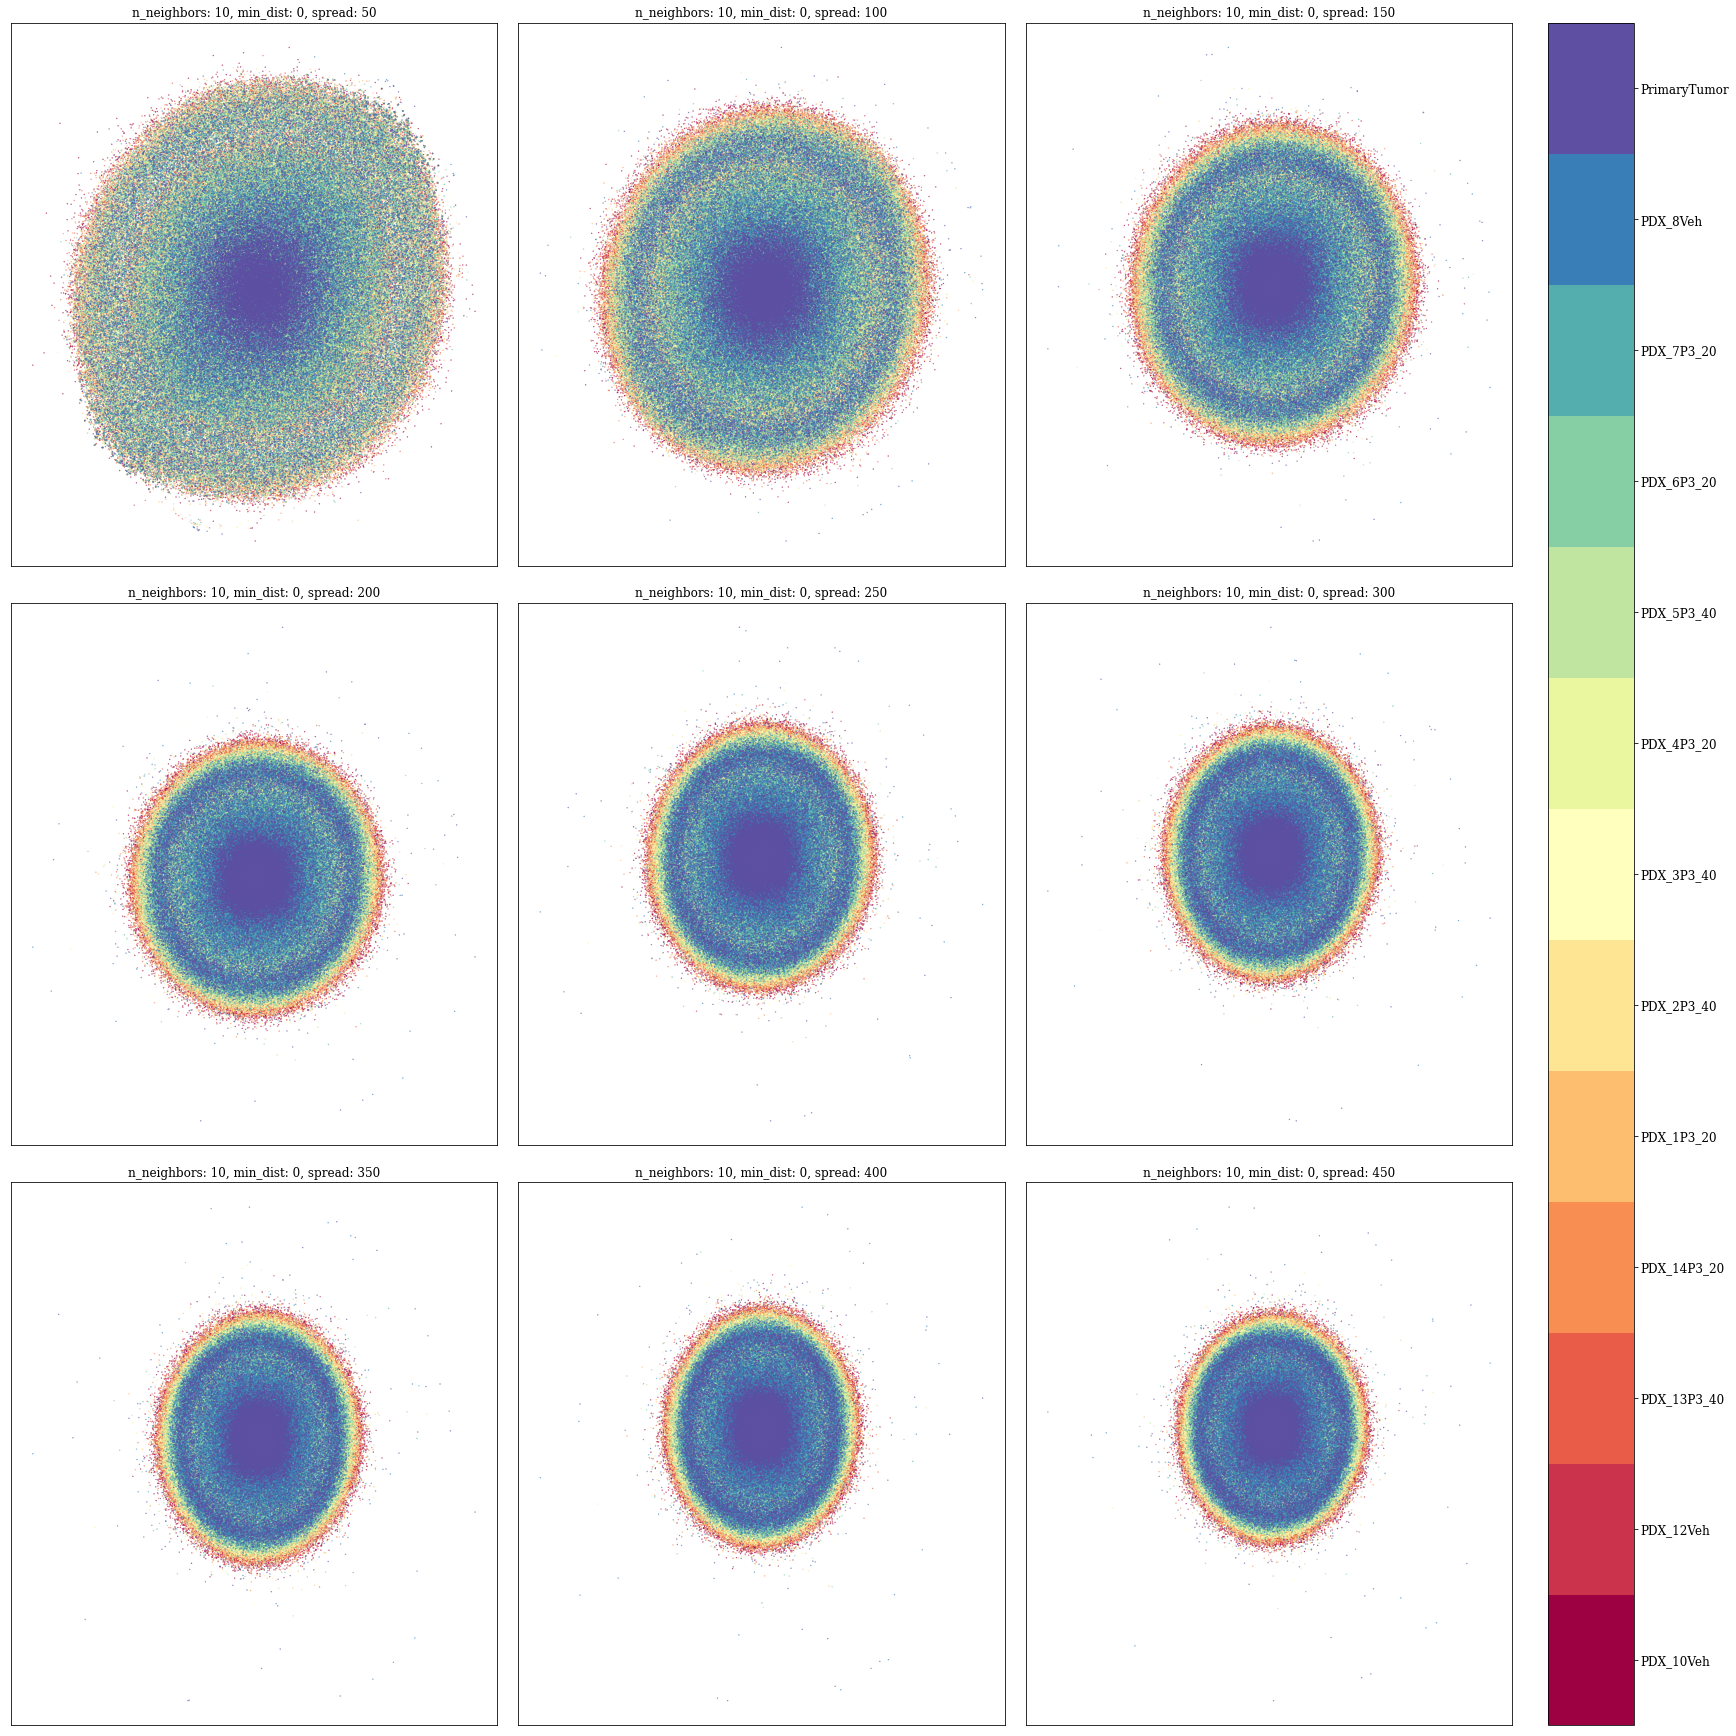

In [16]:
params = {'legend.fontsize': 12, 
                    'font.family': 'serif',
                    'font.weight': 'medium',
                    'font.variant': 'normal',
                    #'figure.figsize': (10, 10), 
                    'figure.edgecolor': '#04253a', 
                    'figure.titlesize': 12, 
                    'axes.labelsize': 6, 
                    'axes.titlesize': 12, 
                    'xtick.labelsize': 6, 
                    'ytick.labelsize': 6}
pylab.rcParams.update(params)
fig, axes = plt.subplots(3, 3, figsize = (24, 24), constrained_layout = True)
print(axes.shape)
width = axes.shape[0]
height = axes.shape[1]
matrix_len = len(embeddings_numpy)
for index in range(matrix_len):
    tmp = embeddings_numpy[index]
    tlt = list(tmp.keys())
    title = tlt[0]
    tmp_embed = list(tmp.values())
    embed = tmp_embed[0]
    x_corrd = int(index / width)
    y_corrd = int(index % height)
    print("x: {x}, y: {y}".format(x = x_corrd, y = y_corrd))
    ax = axes[x_corrd, y_corrd]
    im = ax.scatter(embed[ : , 1], embed[ : , 0], s = 0.1, c = encodedLabels, cmap = 'Spectral', alpha=1.0)
    ax.set_xticks([])
    ax.set_yticks([])
    title_str = "n_neighbors: {n_neighbors}, min_dist: {min_dist}, spread: {spread}".format(n_neighbors = title[0], 
                                                                                           min_dist = title[1], 
                                                                                           spread = title[2])
    ax.set_title(title_str)
# fig.subplots_adjust(right = 0.8)
# cbar = fig.colorbar(im, ax = axes[ : , :], boundaries = np.arange(14) - 0.5)
cbar = plt.colorbar(im, ax = axes, boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
cbar.ax.tick_params(labelsize = 12)
plt.plot()